<a href="https://colab.research.google.com/github/hadi-M/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/HADI_MODARES_LS_DS_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
import numpy as np
import pandas as pd
from pdb import set_trace as st
import matplotlib.pyplot as plt

In [0]:
# hadi_functions.py

def function_output_compare(list_of_functions, *args, **kwargs):
    '''
    This function will pass all the *args and **kwargs arguments to each
    of the functions in the list and print their outputs.
    '''
    for func in list_of_functions:
        print(r"output of function '{}':".format(func.__name__))
        if kwargs == {}:
            print(func(*args), end="\n\n")
        else:
            print(func(*args, **kwargs), end="\n\n")


def my_mean(lst):
    sum = 0
    n = len(lst)

    for item in lst:
        sum += item
    return sum/n


def my_var(lst, ddof):
    mean = my_mean(lst)
    sum = 0
    n = len(lst)

    for item in lst:
        sum += (item - mean) ** 2
    
    return sum/(n-ddof)


def my_std(lst, ddof):
    return my_var(lst, ddof) ** (0.5)


def my_cov(lst_x, lst_y, ddof):
    sum = 0
    mean_x = my_mean(lst_x)
    mean_y = my_mean(lst_y)
    n_x = len(lst_x)

    for x_item, y_item in zip(lst_x, lst_y):
        sum += (x_item - mean_x)*(y_item - mean_y)

    return sum/(n_x-ddof)


def my_corr(lst_x, lst_y):
    return my_cov(lst_x, lst_y, 1) / (my_std(lst_x, 1) * my_std(lst_y, 1))

## Now Using my functions:

In [4]:
x = [3505, 2400, 3027, 2798, 3700, 3250, 2689]
y = [127, 80, 105, 92, 120, 115, 93]

list_of_function_pairs = [
    [[np.mean, my_mean], [x], {}],
    [[np.var, my_var], [x], {"ddof": 1}],
    [[np.std, my_std], [x], {"ddof": 1}],
    [[np.cov, my_cov], [x, y], {"ddof": 1}],
    [[np.corrcoef, my_corr], [x, y], {}]
]

for function_pair in list_of_function_pairs:
    function_output_compare(
        function_pair[0],
        *function_pair[1],
        **(function_pair[2]),
    )
    print("-"*40)

output of function 'mean':
3052.714285714286

output of function 'my_mean':
3052.714285714286

----------------------------------------
output of function 'var':
214387.90476190473

output of function 'my_var':
214387.90476190473

----------------------------------------
output of function 'std':
463.0204150595357

output of function 'my_std':
463.0204150595357

----------------------------------------
output of function 'cov':
[[214387.9047619    7604.35714286]
 [  7604.35714286    290.95238095]]

output of function 'my_cov':
7604.357142857142

----------------------------------------
output of function 'corrcoef':
[[1.         0.96283398]
 [0.96283398 1.        ]]

output of function 'my_corr':
0.9628339778148909

----------------------------------------


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [0]:
# already did

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [0]:
# already did

## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [7]:
!wget https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv

--2020-03-25 21:15:44--  https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 137509 (134K) [text/plain]
Saving to: ‘titanic_clean.csv’

titanic_clean.csv   100%[===================>] 134.29K  --.-KB/s    in 0.04s   

2020-03-25 21:15:44 (3.42 MB/s) - ‘titanic_clean.csv’ saved [137509/137509]



In [8]:
df = pd.read_csv("./titanic_clean.csv").drop("Unnamed: 0", axis=1)
df.head()
# df.columns

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [9]:
# covariance matrix
df.select_dtypes(include=np.number).cov()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [10]:
# correlation matrix
df.select_dtypes(include=np.number).corr()

,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
pclass,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

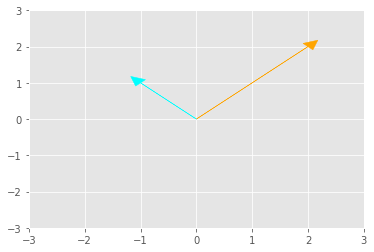

In [11]:
plt.style.use("ggplot")

v1 = np.array([2, 2])
v2 = np.array([-1, 1])

fig, ax = plt.subplots()
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)

plt.arrow(0, 0, v1[0], v1[1], color="orange", head_width=0.25, head_length=0.25)
plt.arrow(0, 0, v2[0], v2[1], color="cyan", head_width=0.25, head_length=0.25)


plt.show()

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [12]:
a = np.array(
    [
        [-5],
        [3],
        [7]
    ]
)

b = np.array(
    [
        [6],
        [-8],
        [2]
    ]
)

np.dot(a.flatten(), b.flatten())
# ISN'T THERE ANY OTHER WAY THAN RESHAPE/FLATTEN?

-40

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [13]:
c = np.array([2, -15, 6, 20])
display(np.linalg.norm(c) ** 2)
display(np.dot(c, c))
display(np.dot(c.transpose(), c))

665.0

665

665

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix} = 7\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12\begin{bmatrix} 0 \\ 1 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix} = 2\begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix} + 11\begin{bmatrix} 0 \\ 1 \\ 0 \end{bmatrix} + (-8)\begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [14]:
f_v = np.array([4, 12, 11, 2, 2])
f_unit = f_v/np.linalg.norm(f_v)
f_unit

array([0.23529412, 0.70588235, 0.64705882, 0.11764706, 0.11764706])

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

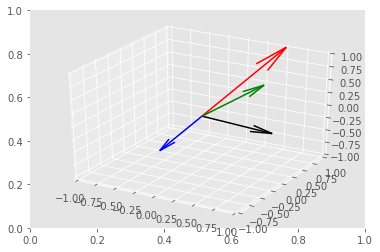

In [15]:
v_dep_1_3d = np.array([2, 4, 4])
v_dep_2_3d = np.array([-1,-2, -2])

v_indep_1_3d = np.array([2, 2, 2])
v_indep_2_3d = np.array([3, 1, -1])

fig, ax = plt.subplots()
ax = fig.add_subplot(111, projection='3d')

ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])
# 
ax.quiver(0, 0, 0, v_dep_1_3d[0], v_dep_1_3d[1], v_dep_1_3d[2], length=0.25, color="red");
ax.quiver(0, 0, 0, v_dep_2_3d[0], v_dep_2_3d[1], v_dep_2_3d[2], length=0.25, color="blue");
ax.quiver(0, 0, 0, v_indep_1_3d[0], v_indep_1_3d[1], v_indep_1_3d[2], length=0.25, color="green");
ax.quiver(0, 0, 0, v_indep_2_3d[0], v_indep_2_3d[1], v_indep_2_3d[2], length=0.25, color="black");

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [0]:
# they're not linearly independent and they can only span on a line

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [17]:
mat = [
    [1, 2, 3],
    [-1, 0, 7],
    [4, 8, 2]
]
np.linalg.matrix_rank(mat)

# so their span is the whole 3d space

3

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



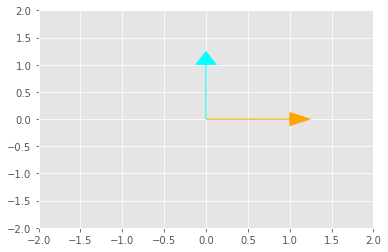

In [18]:
v1 = np.array([1, 0])
v2 = np.array([0, 1])

fig, ax = plt.subplots()
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)

plt.arrow(0, 0, v1[0], v1[1], color="orange", head_width=0.25, head_length=0.25)
plt.arrow(0, 0, v2[0], v2[1], color="cyan", head_width=0.25, head_length=0.25)


plt.show()

## 6.2 What does it mean to form a basis?

it means to create vectors that are linearly independent so they span the whole space.

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [19]:
np.linalg.matrix_rank(mat)

3

## 7.2 What does the rank of a matrix tell us?

it tells us the dimensions of the span that they cover.

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

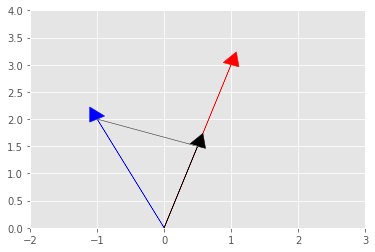

In [20]:
v = np.array([1, 3])
w = np.array([-1, 2])

proj_w = np.dot(v, w) * v / np.dot(v,v)

height_line = proj_w-w

fig, ax = plt.subplots()
ax.set_xlim(-2, 3)
ax.set_ylim(0, 4)

plt.arrow(0, 0, v[0], v[1], head_width=0.25, head_length=0.25, color="red")
plt.arrow(0, 0, w[0], w[1], head_width=0.25, head_length=0.25, color="blue")
plt.arrow(0, 0, proj_w[0], proj_w[1], head_width=0.25, head_length=0.25, color="black")
plt.arrow(w[0], w[1], height_line[0], height_line[1], color="grey")


plt.show()

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

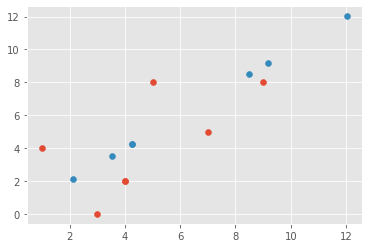

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

def projecter(data_df):
    data_df_with_projected = data_df.copy()
    data_df_with_projected["x_projected"] = data_df_with_projected["x"] * (1/(2 ** (0.5))) + data_df_with_projected["y"] * (1/(2 ** (0.5)))
    data_df_with_projected["y_projected"] = data_df_with_projected["x_projected"]
    # data_df_with_projected["y_projected"] = data_df_with_projected["x_projected"]

    return data_df_with_projected


# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}
df = pd.DataFrame(data)

df_with_projected = projecter(df)


df_with_projected.head()

plt.scatter(df_with_projected.x, df_with_projected.y)
plt.scatter(df_with_projected["x_projected"], df_with_projected["y_projected"])
# plt.show()